# 1. 목표
- 버섯의 특성들을 활용해서 독/식용 분류해보자
- 결정트리를 시각화 해보자
- 특성선택(feature selection)을 해보자

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
# 1. 데이터를 로드 (index는 설정하지 않아도 됨)
# 2. 전체 컬럼, 행의 숫자를 파악해보기
# 3. 결측치가 있는지 파악해보기

In [3]:
data = pd.read_csv('data/mushroom.csv')

data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
data.shape

(8124, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# 3. 데이터 전처리
- 전처리 필요없음

# 4. 탐색적 데이터 분석(EDA)

# 5. 모델링
- 문제 (X)와 정답 (y)으로 분리
- 학습 데이터와 정답데이터로 분리 (train_test_split)

In [7]:
X = data.loc[: , 'cap-shape': ]

X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [8]:
y = data["poisonous"]
# data.loc[: , 'poisonous']

y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object

# 레이블 인코딩
- 숫자의 크고 작음에 대한 특성이 작용함
- 회귀와 같이 연속된 숫자를 다루는 알고리즘에서는 1,2,3 ~ 커지는 숫자가 숫자에 따른 순서나 중요도로 인식이 될 수 있어서 제대로 예측이 불가능함
- 컴퓨터는 2진법으로 모든 데이터를 처리하기 때문에 레이블 인코딩 방식보다는 원핫 인코딩을 주로 사용

In [9]:
# cap-shape 열의 유니크한 값들만 출력해보기
data["cap-shape"].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [10]:
# cap-shape의 유니크값들의 갯수를 확인해보기
data["cap-shape"].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

# 레이블 인코딩

In [11]:
# 레이블 인코딩 진행 후
X["cap-shape"].map({'x' : 0, 'f' : 1, 'k' : 2, 'b' : 3, 's' :  4, 'c' : 5} )

0       0
1       0
2       3
3       0
4       0
       ..
8119    2
8120    0
8121    1
8122    2
8123    0
Name: cap-shape, Length: 8124, dtype: int64

In [12]:
X["cap-shape"]

0       x
1       x
2       b
3       x
4       x
       ..
8119    k
8120    x
8121    f
8122    k
8123    x
Name: cap-shape, Length: 8124, dtype: object

In [13]:
# 레이블 인코딩 자동
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(X['cap-shape']) # 레이블 인코더로 학습
labels = encoder.transform(X['cap-shape']) # 학습시킨 인코더를 숫자로 변환
print(labels)

[5 5 0 ... 2 3 5]


# 원 핫 인코딩
- 언더바 값(유니크 값)으로 존재하면 1 없으면 0 (이진 처리)

In [14]:
X_one_hot = pd.get_dummies(X) # get_dummies => 자동
X_one_hot.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


# 모델링
- 학습데이터와 정답데이터로 나누기

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y,
                                                   test_size = 0.3,
                                                   random_state = 2
                                                   )

X_train

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
2219,0,0,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
4648,0,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2167,0,0,0,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
5269,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2199,0,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
5704,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6637,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
2575,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0


In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5686, 117)
(5686,)
(2438, 117)
(2438,)


In [17]:
# 결정트리 모델을 불러와서 학습시키고 예측해서 정확도를 확인해보자

In [18]:
tree_model = DecisionTreeClassifier()

In [19]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
# pre = tree_model.predict(X_test)

In [21]:
# from sklearn import metrics
# metrics.accuracy_score(pre, y_test)

tree_model.score(X_test,y_test)

#100프로 물리적으로 불가 => 과대적합

1.0

In [31]:
tree_model.score(X_train,y_train)

1.0

# 시각화하기

In [22]:
!pip install graphviz

In [23]:
from sklearn.tree import export_graphviz

In [24]:
export_graphviz(tree_model, out_file = 'data/tree.dot',# dot 파일: 그래프 저장용 텍스트 파일 형식
                class_names = ['독', '식용'],          # 클래스 이름 설정
                # 원 핫 인코딩 된 데이터프레임의 컬럼명을 가져와서 특성 이름으로 지정
                feature_names = X_one_hot.columns,
                # 지니 불순도 미출력
                impurity = False,
                # True라면 노드이 클래스가 구분되도록 색을 칠해줌
                filled = True
                )

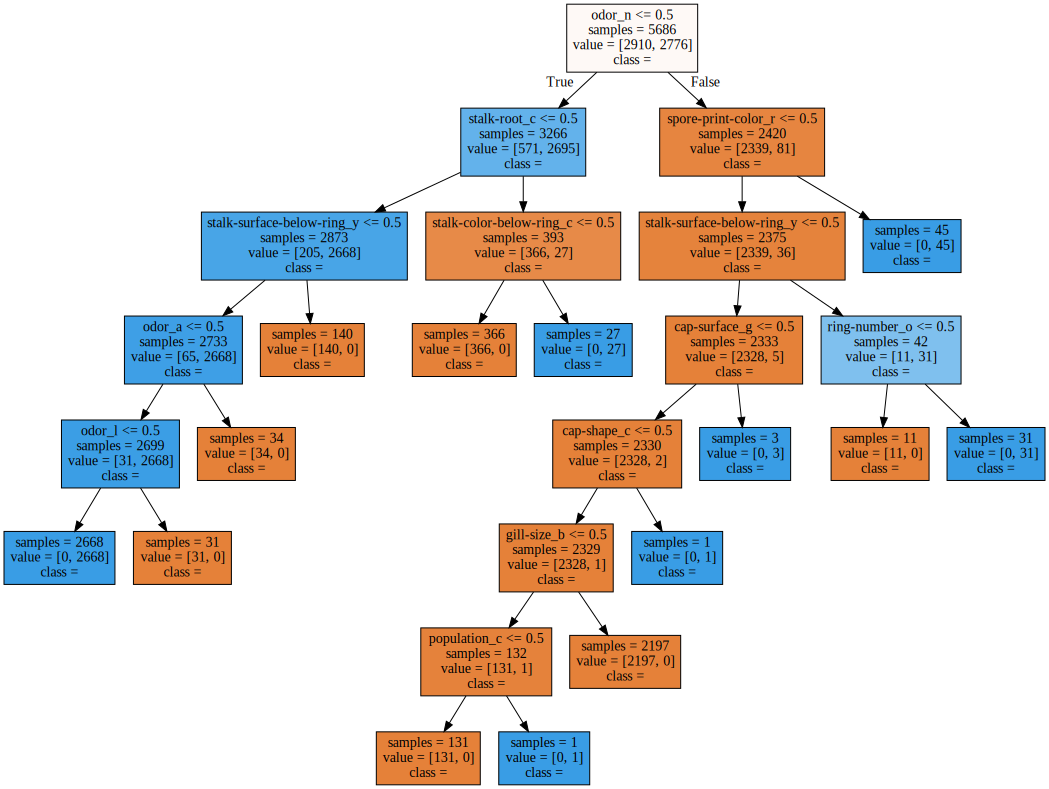

In [25]:
import graphviz

# tree.dot 파일을 불러오면서 UTF8(한글)로 변환을 시켜주어 f라고 지침함
with open('data/tree.dot', encoding= 'UTF8') as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

# <= 0.5 : 원핫 인코딩 후 0,1을 구분하는 조건 (0.5 이하 왼 / 0.5 초과 우)
# sample : 샘플 개수 (하이퍼 파라미터로 제한 가능 -> 샘플 개수 제한 커질수록 좋음)
# value : 클래스 별 개수 ['독'의 개수, '식용'의 개수]
# class : 예측값 (=label)

과대적합제어

In [26]:
# max_depth, max_leaf_nodes, min_sample_leaf

tree_model2 = DecisionTreeClassifier(max_depth = 1)
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [28]:
export_graphviz(tree_model2, out_file = 'data/tree2.dot',
                class_names = ['독', '식용'],         
                feature_names = X_one_hot.columns,
                impurity = False,
                filled = True
                )

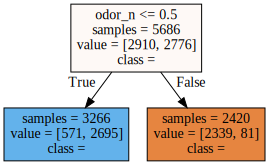

In [29]:
import graphviz

with open('data/tree2.dot', encoding= 'UTF8') as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [30]:
tree_model2.score(X_test,y_test)

0.8900738310090238

In [32]:
tree_model2.score(X_train,y_train)

0.8853323953570172

# 특성선택 (feature selection)
- tree 모델의 특성중요도 (각 특성들은 0-1 사이의 중요도 값을 가짐, 모든 특성의 중요도의 합은 1이 됨)
- 0이 나오는 컬럼은 모델이 정답을 예측하는데 전혀 사용되지 않은 특성
- 1은 완벽하게 정답을 예측해 내는 특성

In [34]:
# 특성 중요도를 출력하기!
fi = tree_model.feature_importances_
fi

array([0.00000000e+00, 7.02967014e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10528527e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.30941752e-02, 0.00000000e+00,
       0.00000000e+00, 2.15694484e-02, 0.00000000e+00, 6.13249854e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.03015123e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.79947768e-01, 0.00000000e+00, 0.00000000e+00,
      

In [35]:
len(fi)

117

In [36]:
X_one_hot.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [38]:
# 특성 중요도를 데이터 프레임화 시킨후 내림차순으로 정렬하기
fi_df = pd.DataFrame(fi, index = X_one_hot.columns)
fi_df.sort_values(by = 0, ascending = False)

,0
odor_n,0.613250
stalk-root_c,0.179948
stalk-surface-below-ring_y,0.105063
spore-print-color_r,0.030150
odor_a,0.023094
...,...
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_n,0.000000
gill-spacing_w,0.000000
